In [1]:
# Q train
# average AM enters / exits

In [1]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [2]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [4]:
# look at Q line only
Q_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('Q')]

In [5]:
# look at all station names
Q_train_all['STATION'].unique()

array(['14 ST-UNION SQ', '30 AV', '34 ST-HERALD SQ', '36 AV',
       '42 ST-PORT AUTH', '49 ST', '5 AV/59 ST', '57 ST-7 AV', '59 ST',
       '7 AV', '72 ST-2 AVE', '86 ST-2 AVE', '96 ST-2 AVE',
       'ASTORIA BLVD', 'ASTORIA DITMARS', 'ATL AV-BARCLAY', 'AVENUE H',
       'AVENUE J', 'AVENUE M', 'AVENUE U', "B'WAY-LAFAYETTE",
       'BEVERLEY ROAD', 'BRIGHTON BEACH', 'CANAL ST', 'CHURCH AV',
       'CONEY IS-STILLW', 'CORTELYOU RD', 'DEKALB AV', 'KINGS HWY',
       'NECK RD', 'NEWKIRK PLAZA', 'OCEAN PKWY', 'PARKSIDE AV',
       'PROSPECT PARK', 'QUEENSBORO PLZ', 'SHEEPSHEAD BAY',
       'TIMES SQ-42 ST', 'W 8 ST-AQUARIUM'], dtype=object)

In [6]:
# check station count
Q_train_all['STATION'].count()

43

In [8]:
# needs further cleaning
Q_train_all["STATION"].replace("42 ST-PORT AUTH", value="TIMES SQ-42 ST", inplace=True)

In [10]:
# now sum same name rows
Q_commuters = Q_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
Q_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
14 ST-UNION SQ,17962.0,48134.0
30 AV,6376.0,1530.0
34 ST-HERALD SQ,14027.0,21487.0
36 AV,3598.0,1718.0
49 ST,1351.0,6840.0


In [11]:
# order stations in excel
# save as csv
Q_commuters.to_csv('Q_commuters.csv')

In [12]:
# open ordered CSV
csv_path_Q = 'Q_commuters_order.csv'
Q_commuters_order = pd.read_csv(csv_path_Q, encoding="utf-8")
Q_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,96 ST-2 AVE,16102,6955
1,86 ST-2 AVE,18322,7555
2,72 ST-2 AVE,10584,20701
3,5 AV/59 ST,2796,18810
4,57 ST-7 AV,2206,8214


In [13]:
Q_commuters_order['AM_AVG_ENTER'] = Q_commuters_order['AM_ENTERS']/5

In [14]:
Q_commuters_order['AM_AVG_EXIT'] = Q_commuters_order['AM_EXITS']/5
Q_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,96 ST-2 AVE,16102,6955,3220.4,1391.0
1,86 ST-2 AVE,18322,7555,3664.4,1511.0
2,72 ST-2 AVE,10584,20701,2116.8,4140.2
3,5 AV/59 ST,2796,18810,559.2,3762.0
4,57 ST-7 AV,2206,8214,441.2,1642.8


In [15]:
# order stations in excel
# save as csv
Q_commuters_order.to_csv('Q_commuters_final.csv')

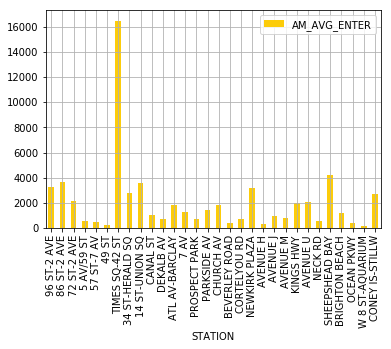

In [18]:
# graph Q Train AM AVG ENTERS
plt = Q_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#FCCC0A')
plt.grid()

# save the fig
plt.figure.savefig('Q-AM-enter.pdf')
plt.figure.savefig('Q-AM-enter.jpg')

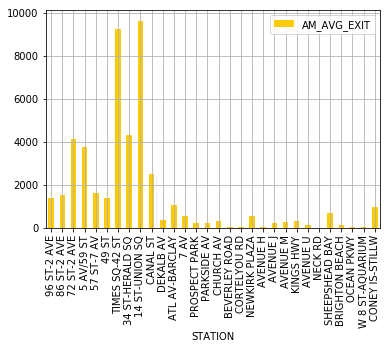

In [19]:
# graph Q Train AM AVG EXITS
plt = Q_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#FCCC0A')
plt.grid()

# save the figa
plt.figure.savefig('Q-AM-exit.pdf')
plt.figure.savefig('Q-AM-exit.jpg')